In [2]:
using PyCall
using Plots; pyplot()
using Statistics
using LinearAlgebra
using NBInclude

┌ Info: Recompiling stale cache file /home/humberto/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


In [3]:
vtk = pyimport("vtk")
np = pyimport("numpy")

PyObject <module 'numpy' from '/usr/lib/python3.7/site-packages/numpy/__init__.py'>

In [46]:
reader = vtk.vtkUnstructuredGridReader()
reader.SetFileName("../data/h06.vtk")
reader.Update()
output = reader.GetOutput()
points = output.GetPoints()
r = [collect(points.GetPoint(i-1)) for i in 1:points.GetNumberOfPoints()]
length(r)

262144

In [47]:
z = [r[i][3] for i=1:262144]

println(sum( abs.(z.-mean(z)))/length(z))
println(std(z))


9.999999999688772
12.323348065863858


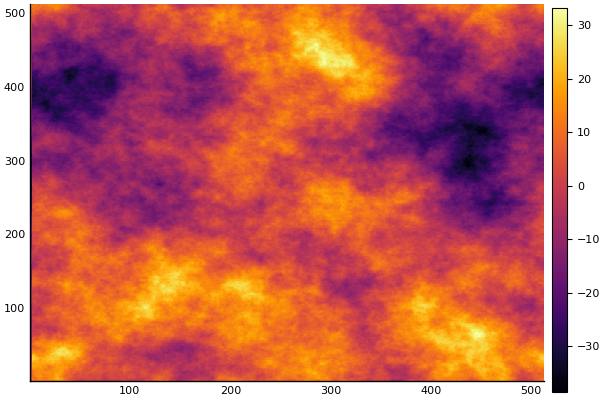

In [48]:
z = reshape(z,512,512)
heatmap(z)

In [49]:
@nbinclude("dfa.ipynb")
dfa2d(z)

0.5161201491163824

In [50]:
function fbmArea(z)
    nx, ny = size(z)
    area = 0.0
    for i=1:nx-1
        for j=1:ny-1
            v1 = [0; 1; z[i,j+1] - z[i,j]]
            v2 = [1; 0; z[i+1,j] - z[i,j]]    
            v3 = [0; -1; z[i+1,j] - z[i+1,j+1]]
            v4 = [-1; 0; z[i,j+1] - z[i+1,j+1]]    
            area += (norm(v2 × v1)+norm(v4 × v3))/2
        end
    end
    
    Lp  = 0.0
    for i=1:nx-1 # eval Lp for each line
        
        for j=1:ny-1
            v1 = [1; 0; z[i+1,j] - z[i,j]]    
            Lp += norm(v1)
        end
    
    end
    
    return area/(nx*ny), (Lp/ny)/nx
end

fbmArea (generic function with 1 method)

In [51]:
fbmArea(z)

(1.6733008553358502, 1.3309024557876237)

In [6]:
2^9

512